In [115]:
import pandas as pd

In [116]:
data = pd.read_csv ('/Users/havvadogan/Desktop/python_intro/advertising.csv')
df = data
df.head()

,Unnamed: 0,TV,Radio,Newspaper,Sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9


In [118]:
import seaborn as sns
import matplotlib.pyplot as plt

In [119]:
column_names = df.columns.tolist()
for column in column_names:
    print(column)

Unnamed: 0
TV
Radio
Newspaper
Sales


In [120]:

df.rename(columns={'Unnamed: 0': 'Index'}, inplace=True)

In [121]:
df = df.drop('Index', axis=1)

In [122]:
df.head(2)

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4


In [123]:
df

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9
...,...,...,...,...
195,38.2,3.7,13.8,7.6
196,94.2,4.9,8.1,9.7
197,177.0,9.3,6.4,12.8
198,283.6,42.0,66.2,25.5


In [124]:
df.shape

(200, 4)

In [125]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   Radio      200 non-null    float64
 2   Newspaper  200 non-null    float64
 3   Sales      200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB


In [126]:
# no missing data

In [127]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
TV,200.0,147.0425,85.854236,0.7,74.375,149.75,218.825,296.4
Radio,200.0,23.2640,14.846809,0.0,9.975,22.90,36.525,49.6
Newspaper,200.0,30.5540,21.778621,0.3,12.750,25.75,45.100,114.0
Sales,200.0,14.0225,5.217457,1.6,10.375,12.90,17.400,27.0


# 
Understanding the relationship between TV, Radio, Newspaper advertising spending and Sales.

array([[<Axes: title={'center': 'TV'}>,
        <Axes: title={'center': 'Radio'}>],
       [<Axes: title={'center': 'Newspaper'}>,
        <Axes: title={'center': 'Sales'}>]], dtype=object)

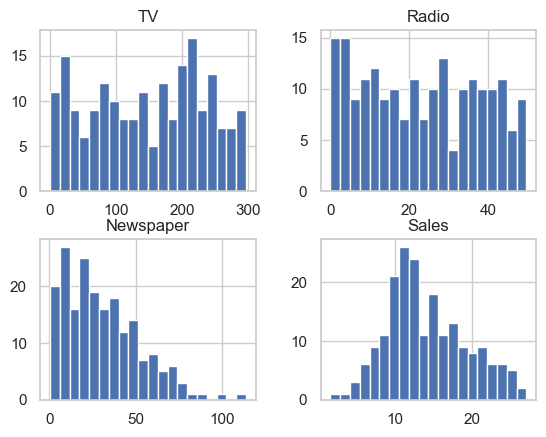

In [129]:
df.hist(bins=20)

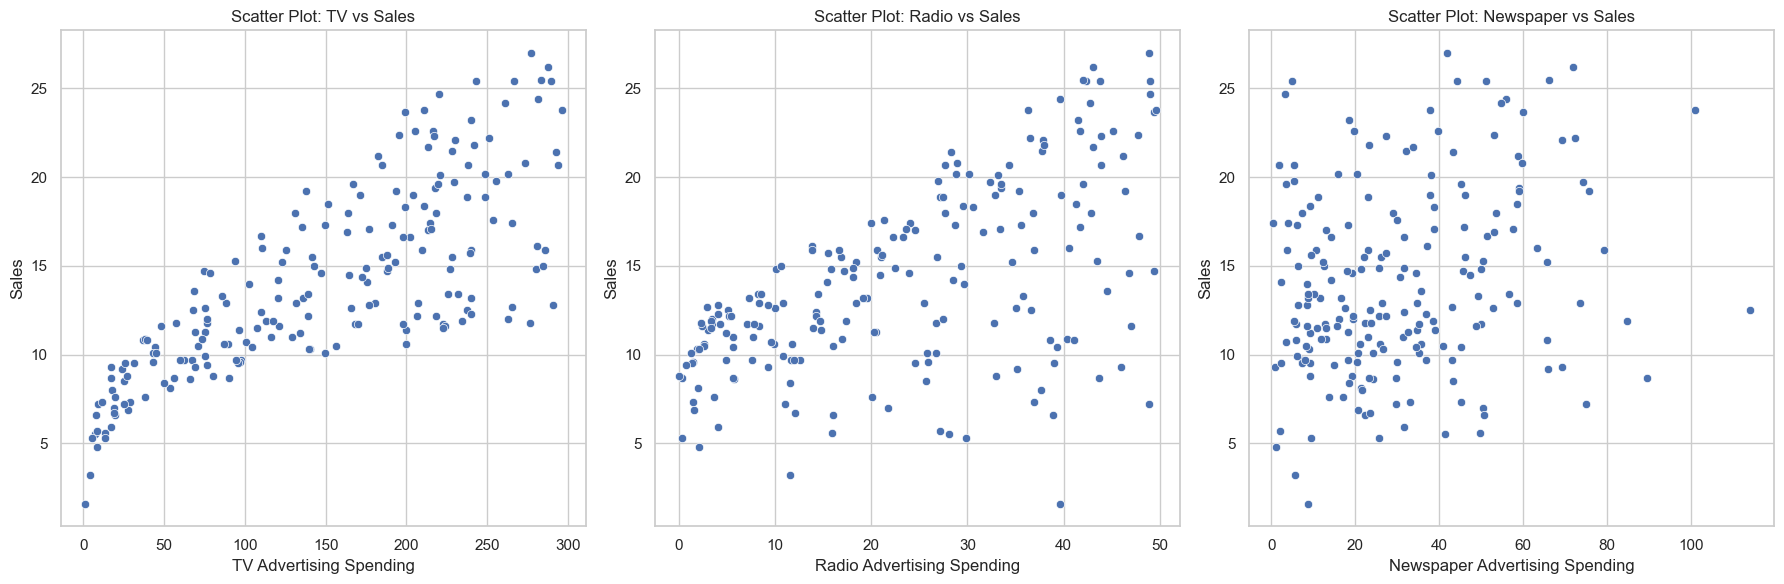

In [107]:
# Create a 1x3 grid of subplots
fig, axes = plt.subplots(1, 3, figsize=(18, 6))

# Scatter plot for TV vs Sales
sns.scatterplot(x='TV', y='Sales', data=df, ax=axes[0])
axes[0].set_xlabel('TV Advertising Spending')
axes[0].set_ylabel('Sales')
axes[0].set_title('Scatter Plot: TV vs Sales')

# Scatter plot for Radio vs Sales
sns.scatterplot(x='Radio', y='Sales', data=df, ax=axes[1])
axes[1].set_xlabel('Radio Advertising Spending')
axes[1].set_ylabel('Sales')
axes[1].set_title('Scatter Plot: Radio vs Sales')

# Scatter plot for Newspaper vs Sales
sns.scatterplot(x='Newspaper', y='Sales', data=df, ax=axes[2])
axes[2].set_xlabel('Newspaper Advertising Spending')
axes[2].set_ylabel('Sales')
axes[2].set_title('Scatter Plot: Newspaper vs Sales')

plt.tight_layout()
plt.show()

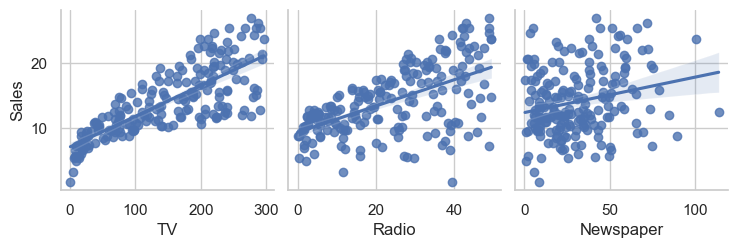

In [108]:
# Pair plot with regression lines

sns.pairplot(df, x_vars=['TV', 'Radio', 'Newspaper'], y_vars='Sales', kind='reg')
plt.show()

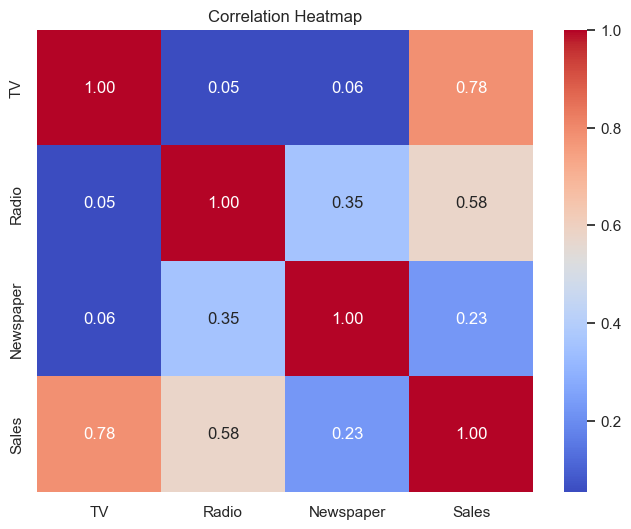

In [62]:
# Calculate the correlation matrix
correlation_matrix = df.corr()

# Plot the correlation heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap')
plt.show()

#
Box plots show the median, quartiles, and outliers and helps us to understand the spread of the data


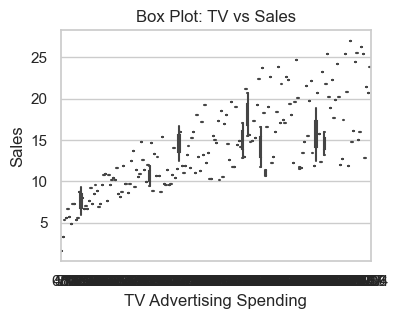

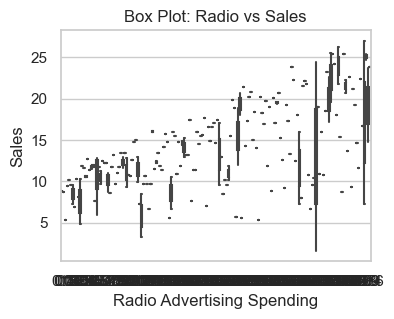

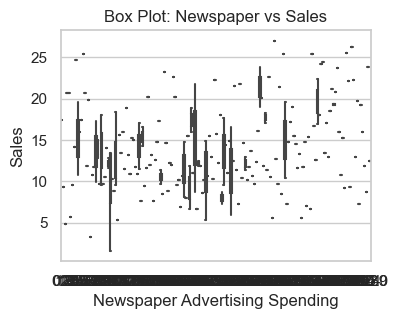

In [109]:
# Box plot for TV
plt.figure(figsize=(4, 3))
sns.boxplot(x='TV', y='Sales', data=df)
plt.xlabel('TV Advertising Spending')
plt.ylabel('Sales')
plt.title('Box Plot: TV vs Sales')
plt.show()

# Box plot for Radio
plt.figure(figsize=(4, 3))
sns.boxplot(x='Radio', y='Sales', data=df)
plt.xlabel('Radio Advertising Spending')
plt.ylabel('Sales')
plt.title('Box Plot: Radio vs Sales')
plt.show()

# Box plot for Newspaper
plt.figure(figsize=(4, 3))
sns.boxplot(x='Newspaper', y='Sales', data=df)
plt.xlabel('Newspaper Advertising Spending')
plt.ylabel('Sales')
plt.title('Box Plot: Newspaper vs Sales')
plt.show()

# Feature engineering

##
Total Advertisement Spending

In [67]:
df['Total_Ad_Spending'] = df['TV'] + df['Radio'] + df['Newspaper']

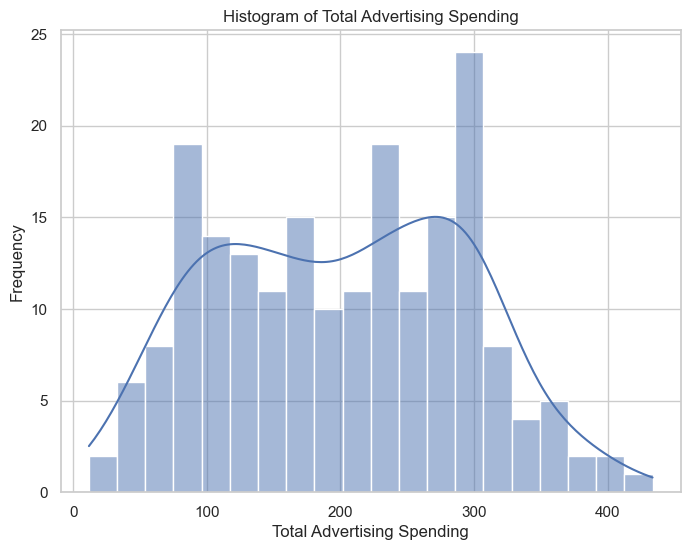

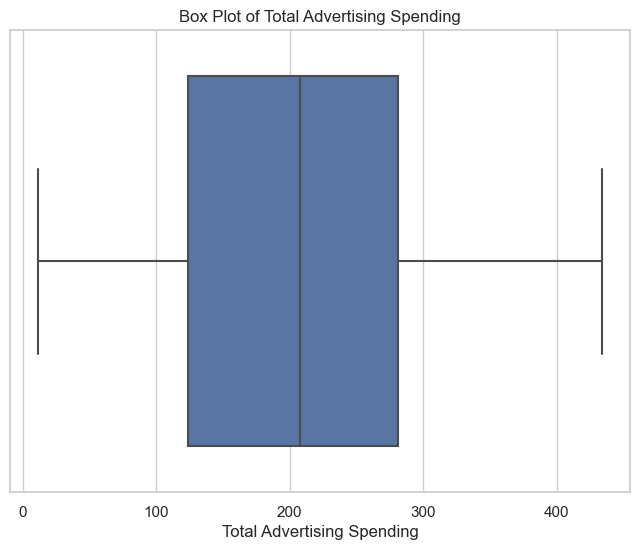

In [71]:
# Histogram of Total Advertising Spending
plt.figure(figsize=(8, 6))
sns.histplot(df['Total_Ad_Spending'], bins=20, kde=True)
plt.xlabel('Total Advertising Spending')
plt.ylabel('Frequency')
plt.title('Histogram of Total Advertising Spending')
plt.show()

# Box plot of Total Advertising Spending
plt.figure(figsize=(8, 6))
sns.boxplot(x=df['Total_Ad_Spending'])
plt.xlabel('Total Advertising Spending')
plt.title('Box Plot of Total Advertising Spending')
plt.show()

#
Creating three new interaction features by multiplying different advertising spending variables together. It is aimed to capture the potential combined effects of these variables on the target variable:'Sales'.

In [68]:
df['TV_Radio_Interact'] = df['TV'] * df['Radio']
df['TV_Newspaper_Interact'] = df['TV'] * df['Newspaper']
df['Radio_Newspaper_Interact'] = df['Radio'] * df['Newspaper']

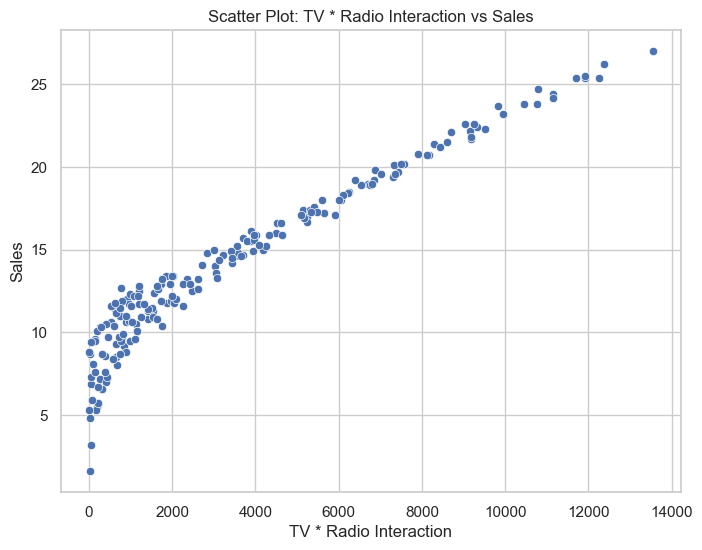

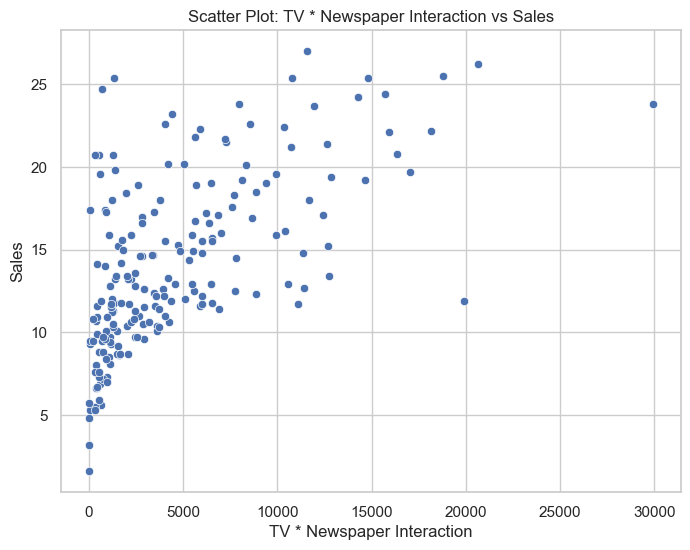

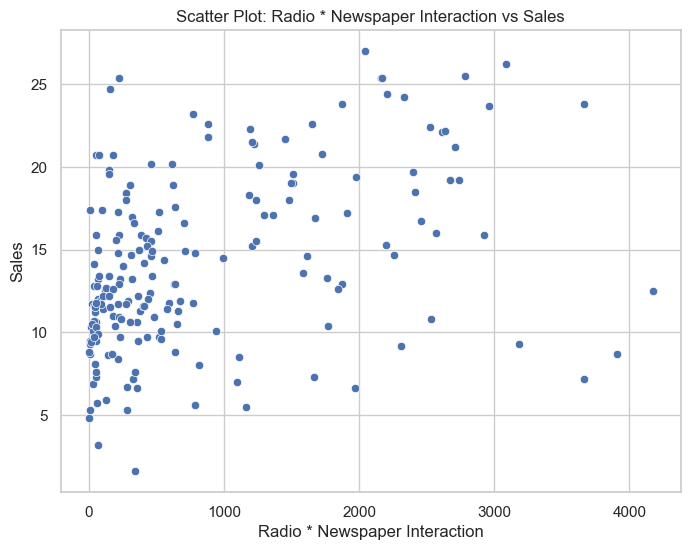

In [72]:
# Scatter plot for TV_Radio_Interact vs Sales
plt.figure(figsize=(8, 6))
sns.scatterplot(x='TV_Radio_Interact', y='Sales', data=df)
plt.xlabel('TV * Radio Interaction')
plt.ylabel('Sales')
plt.title('Scatter Plot: TV * Radio Interaction vs Sales')
plt.show()

# Scatter plot for TV_Newspaper_Interact vs Sales
plt.figure(figsize=(8, 6))
sns.scatterplot(x='TV_Newspaper_Interact', y='Sales', data=df)
plt.xlabel('TV * Newspaper Interaction')
plt.ylabel('Sales')
plt.title('Scatter Plot: TV * Newspaper Interaction vs Sales')
plt.show()

# Scatter plot for Radio_Newspaper_Interact vs Sales
plt.figure(figsize=(8, 6))
sns.scatterplot(x='Radio_Newspaper_Interact', y='Sales', data=df)
plt.xlabel('Radio * Newspaper Interaction')
plt.ylabel('Sales')
plt.title('Scatter Plot: Radio * Newspaper Interaction vs Sales')
plt.show()

##
Creating three new features to measure the intensity 

Intensity is considered as the advertising spending for each medium relative to the total advertising spending. 

=> the proportion of advertising budget allocated to each medium.

In [69]:
df['TV_Ad_Intensity'] = df['TV'] / df['Total_Ad_Spending']
df['Radio_Ad_Intensity'] = df['Radio'] / df['Total_Ad_Spending']
df['Newspaper_Ad_Intensity'] = df['Newspaper'] / df['Total_Ad_Spending']

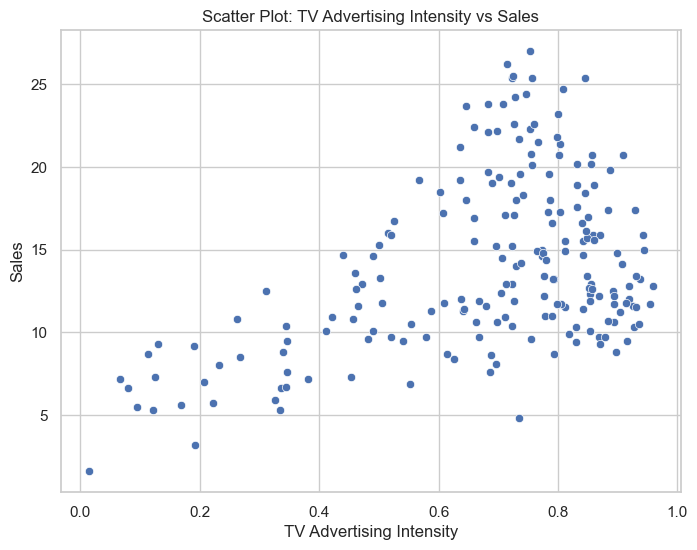

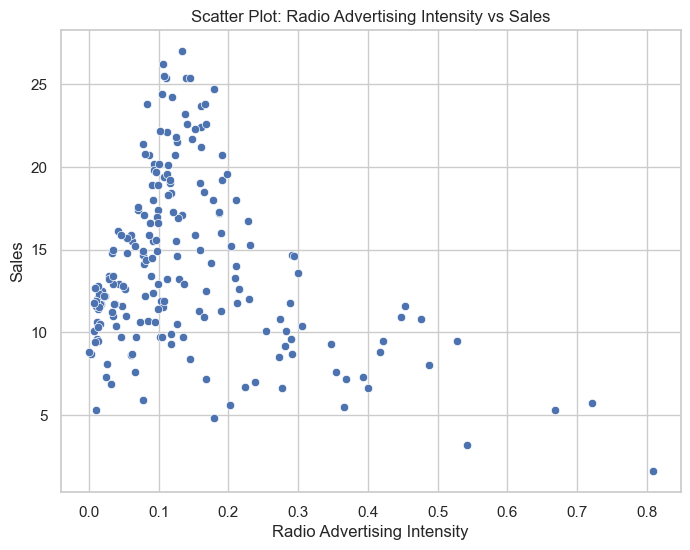

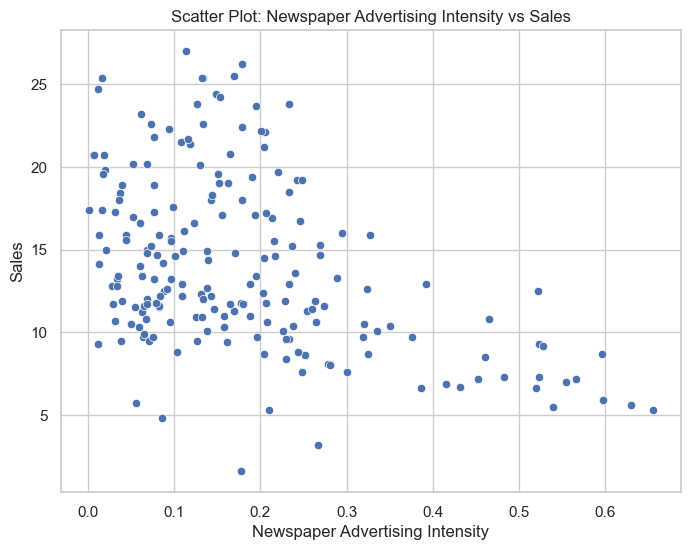

In [73]:
# Scatter plot for TV_Ad_Intensity vs Sales
plt.figure(figsize=(8, 6))
sns.scatterplot(x='TV_Ad_Intensity', y='Sales', data=df)
plt.xlabel('TV Advertising Intensity')
plt.ylabel('Sales')
plt.title('Scatter Plot: TV Advertising Intensity vs Sales')
plt.show()

# Scatter plot for Radio_Ad_Intensity vs Sales
plt.figure(figsize=(8, 6))
sns.scatterplot(x='Radio_Ad_Intensity', y='Sales', data=df)
plt.xlabel('Radio Advertising Intensity')
plt.ylabel('Sales')
plt.title('Scatter Plot: Radio Advertising Intensity vs Sales')
plt.show()

# Scatter plot for Newspaper_Ad_Intensity vs Sales
plt.figure(figsize=(8, 6))
sns.scatterplot(x='Newspaper_Ad_Intensity', y='Sales', data=df)
plt.xlabel('Newspaper Advertising Intensity')
plt.ylabel('Sales')
plt.title('Scatter Plot: Newspaper Advertising Intensity vs Sales')
plt.show()


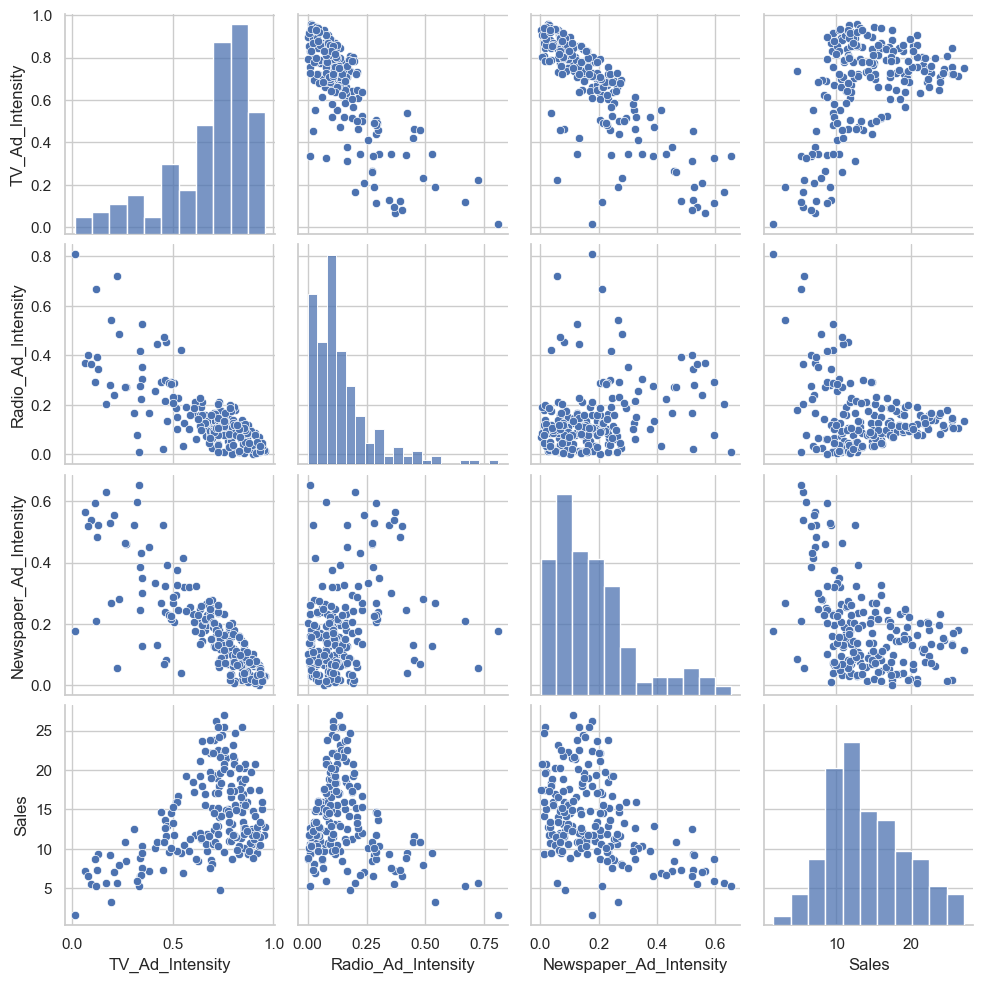

In [74]:
sns.pairplot(df, vars=['TV_Ad_Intensity', 'Radio_Ad_Intensity', 'Newspaper_Ad_Intensity', 'Sales'])
plt.show()

##
Findings

Findings: Analysis of Advertising Impact on Sales

Based on the exploratory data analysis conducted on the advertising dataset, several key findings have been identified regarding the relationship between different advertising media and sales. The analysis aimed to understand the predictive power of each advertising medium and explore potential synergistic effects when combining them.

Predictive Power of TV Advertising: The data analysis indicates that TV advertising demonstrates a stronger predictive power for sales compared to radio and newspaper advertising. A linear regression model fitted to the data shows a higher goodness of fit for TV advertisements, implying that changes in TV advertising spending have a more significant impact on sales compared to the other mediums.

Unpredictability of Newspaper Advertising: In contrast, newspaper advertising appears to be the most distributed and unpredictable mean of advertisement in terms of its impact on sales. Scatter plots reveal less discernible patterns between newspaper advertising spending and sales, suggesting that this medium may have a less direct and consistent effect on sales figures.

Correlations with Sales: The correlation analysis further supports the above findings. TV advertising exhibits a strong positive correlation of 0.78 with sales, indicating a substantial relationship between TV spending and sales performance. Radio advertising follows with a correlation of 0.58, suggesting a moderate relationship. However, newspaper advertising shows a notably lower correlation of 0.23, reinforcing its relative unpredictability in driving sales figures.

Potential Synergistic Effects: The combination of TV and radio advertising seems to have the potential to yield higher and more predictable sales results. Scatter plots of TV-Radio interactions display more consistent patterns, suggesting that the joint effect of these two advertising mediums may have a cumulative impact on sales, making it more amenable to prediction.

In conclusion, this analysis highlights the varying impacts of different advertising media on sales figures. TV advertising emerges as the most reliable predictor, while newspaper advertising appears to have a less straightforward relationship with sales. The synergistic effects of TV and radio advertising demonstrate promise in achieving more predictable sales outcomes. These findings provide valuable insights for optimizing advertising strategies to enhance sales performance.